# Epiciclos y series de Fourier

El código usado en este notebook ha sido adaptado desde la versión original disponible [aquí](https://github.com/WiraDKP/Discrete_Fourier_Transform_Epicycle).

Una introducción general a los epiciclos y su historia puede encontrarse en la correspondiente página en [Wikipedia](https://es.wikipedia.org/wiki/Epiciclo). Un buen video  (en inglés) con más detalles puede encontrarse [aquí](https://www.youtube.com/watch?v=qS4H6PEcCCA):

Primero cargamos las funciones en el módulo `presentation`, donde se implementan funciones que calculan los coeficientes de Fourier, el cálculo de la serie de Fourier truncada, y el código que genera la animación de los epiciclos.

In [1]:
from presentation import *
import numpy as np

# Ejemplo 1: Un cuadrado

In [2]:
t = np.array([0.,1,2,3,4])
x = [-10.,10,10,-10,-10]
y = [-10.,-10,10,10,-10]

# Ejemplo 2: Elipse

In [3]:
#t = np.linspace(0,2*np.pi,1000)
#a = 1
#e = 0.5
#r = a*(1-e**2)/(1+e*np.cos(t))

# Ejemplo 3: Corazón

$$
r(\varphi) = \frac{\sin(\varphi)\sqrt{|\cos(\varphi)|}}{\sin(\varphi)+\frac{7}{5}}-2\sin(\varphi)+2
$$

In [4]:
#t = np.linspace(0,2*np.pi,1000)
#r = np.sin(t)*np.sqrt(np.abs(np.cos(t)))/(np.sin(t)+7/5.)-2*np.sin(t)+2

In [5]:
#x = r*np.cos(t)
#y = r*np.sin(t)

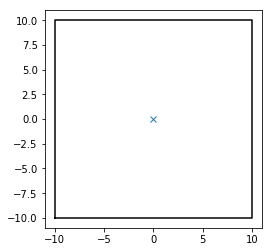

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(x,y, 'k-')
ax.plot(0,0,'x')
plt.show()

## Calcula los coeficientes de Fourier

In [7]:
tau = max(t)-min(t)
order = 10
coef = coef_list(t, x, y, order)
for id,n in enumerate(range(-order,order+1)):
    print('n = ',str(n),': ',coef[id])

n =  -10 :  (1.942890293094024e-16+9.71445146547012e-16j)
n =  -9 :  (9.228728892196614e-16+7.91033905045424e-16j)
n =  -8 :  (4.718447854656915e-16-5.551115123125783e-17j)
n =  -7 :  (-0.16542234064055097-0.16542234064054973j)
n =  -6 :  (1.4611613694881362e-17-1.138748010721125e-15j)
n =  -5 :  (-9.992007221626409e-16+2.220446049250313e-16j)
n =  -4 :  (1.6628223402624702e-15+4.3113298712874305e-17j)
n =  -3 :  (-0.9006327434874463-0.9006327434874457j)
n =  -2 :  (-3.3306690738754696e-16+9.992007221626409e-16j)
n =  -1 :  (-2.220446049250313e-16-2.220446049250313e-16j)
n =  0 :  (4.8687569630740856e-17+1.8448044904118425e-17j)
n =  1 :  (-8.105694691387022-8.105694691387022j)
n =  2 :  (5.926673810494577e-16+8.111619621110057e-16j)
n =  3 :  (4.440892098500626e-16+2.220446049250313e-16j)
n =  4 :  (1.9984014443252818e-15-1.1102230246251565e-16j)
n =  5 :  (-0.32422778765548077-0.32422778765548077j)
n =  6 :  (-1.2532486391652197e-15+1.5918911790160253e-15j)
n =  7 :  (2.2204460492503

## Evalúa serie Truncada

In [8]:
space = np.linspace(min(t), max(t), 300)
x_Sn, y_Sn = Sn(space, coef, order)

## Gráfico

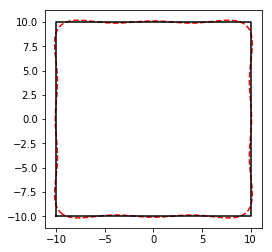

In [9]:
fig, ax = plt.subplots()
ax.plot(x_Sn, y_Sn, 'r--')
ax.plot(x, y, 'k-')
ax.set_aspect('equal')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.show()

## Crea animación

In [10]:
anim = visualize(x_Sn, y_Sn, tau, coef, order, space, [xmin, xmax, ymin, ymax])
#Writer = animation.writers['html']
Writer = animation.writers['ffmpeg']
writer = Writer(fps=60)
anim.save('ani.mp4',writer=writer, dpi=150)